In [1]:
pip install pandas scikit-learn matplotlib xlrd


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\siddu\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Accuracy: 0.957
              precision    recall  f1-score   support

           0      0.923     1.000     0.960        48
           1      1.000     0.913     0.955        46

    accuracy                          0.957        94
   macro avg      0.962     0.957     0.957        94
weighted avg      0.961     0.957     0.957        94



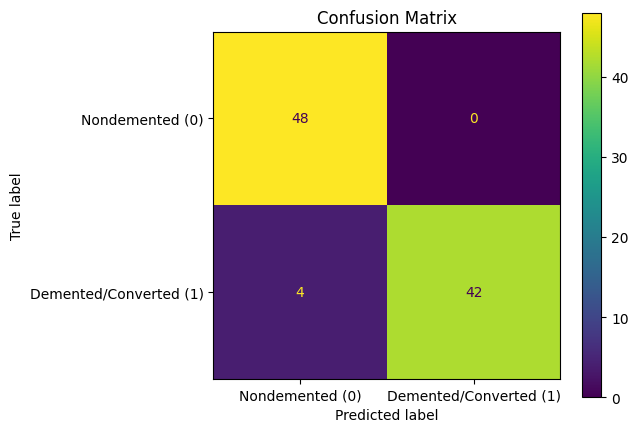

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay,
                             roc_auc_score, RocCurveDisplay)


df = pd.read_excel("dementia_dataset (2).xls")

label_map = {"Nondemented": 0, "NonDemented": 0, "NONDEMENTED": 0,
             "Demented": 1, "Converted": 1}
df = df.copy()
df["target"] = df["Group"].map(label_map)
df = df.dropna(subset=["target"])
df["target"] = df["target"].astype(int)

drop_cols = [c for c in ["Subject ID", "MRI ID"] if c in df.columns]
df = df.drop(columns=drop_cols)

numeric_wishlist = ["Visit","MR Delay","Age","EDUC","SES","MMSE","CDR","eTIV","nWBV","ASF"]
cat_wishlist     = ["M/F","Hand"]

num_cols = [c for c in numeric_wishlist if c in df.columns]
cat_cols = [c for c in cat_wishlist if c in df.columns]

X = df[num_cols + cat_cols]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols)
    ],
    remainder="drop"
)

clf = Pipeline(steps=[
    ("prep", preprocess),
    ("model", LogisticRegression(max_iter=2000, class_weight="balanced"))
])

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print(classification_report(y_test, y_pred, digits=3))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Nondemented (0)","Demented/Converted (1)"])
disp.plot()
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

